In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import std
import seaborn as sns
from scipy import stats
import json
import ast

In [2]:
df = pd.read_csv('phily_users_businesses_stars.csv')
df

,user_id,business_id,stars
0,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0
1,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0
2,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0
3,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0
4,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5.0
...,...,...,...
967547,5d32aJe0a3_fSl3LIVYkWQ,EmrOCT7fArKI0JI_XF6aaw,1.0
967548,am7-gkH_PDz598oTdYSD6A,3gVSrS4kffGGZT8oXHsIcw,3.0
967549,-AkziDwQ8hv2COTDBBUpig,aunmz06iWvo3bd6MMHEbqg,3.0
967550,7ziWZULyiZv2TesYNMFf4g,qQO7ErS_RAN4Vs1uX0L55Q,4.0


                                                -Step 1-


In [4]:
#i=0
column1_counts = df['user_id'].value_counts()
column2_counts = df['business_id'].value_counts()
frequent_values_1 = column1_counts[column1_counts >= 15].index
frequent_values_2 = column2_counts[column2_counts >= 15].index
df = df[df['user_id'].isin(frequent_values_1) & df['business_id'].isin(frequent_values_2)].reset_index(drop=True)
while True :
    column1_counts = df['user_id'].value_counts()
    column2_counts = df['business_id'].value_counts()
    frequent_values_1 = column1_counts[column1_counts >= 15].index
    frequent_values_2 = column2_counts[column2_counts >= 15].index
    df = df[df['user_id'].isin(frequent_values_1) & df['business_id'].isin(frequent_values_2)]
    #print(i)
    #i= i+1
    if (df.groupby(['user_id']).size() >= 15  ).all() and (df.groupby(['business_id']).size() >= 15  ).all() :
        break
    else:
       # print(i,"inside")
        continue

In [5]:
df

,user_id,business_id,stars
0,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0
1,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0
2,vrKkXsozqqecF3CW4cGaVQ,rjuWz_AD3WfXJc03AhIO_w,5.0
3,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0
4,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5.0
...,...,...,...
323635,LHWtjTG7e1NzNPYUbUo-9w,rgeuy1qbw6Z8B6CSVANHIA,5.0
323636,7-7A0Avj47slLGV7yBFc8w,ytynqOUb3hjKeJfRj5Tshw,3.0
323637,am7-gkH_PDz598oTdYSD6A,3gVSrS4kffGGZT8oXHsIcw,3.0
323638,7ziWZULyiZv2TesYNMFf4g,qQO7ErS_RAN4Vs1uX0L55Q,4.0


In [6]:
df5 = df.groupby(['business_id']).size()

In [7]:
df4 = (df.groupby(['user_id']).size())

In [8]:
mask = df4.lt(15).any()
mask

False

In [9]:
mask1 = df5.lt(15).any()
mask1

False

using mask and groupby , i coundt find any rows businesses or users with less than 15 inputs but they dont match the .csv that was provided 


In [10]:
print("M=",len(df5), "N=",len(df4),"and the set of 3s =",len(df))

M= 4369 N= 7759 and the set of 3s = 318544


                                                -Step 2-

In [11]:
df_s2 = pd.read_csv('phily_users_businesses_stars_pruned.csv')
df_s2

,user_id,business_id,stars
0,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0
1,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0
2,vrKkXsozqqecF3CW4cGaVQ,rjuWz_AD3WfXJc03AhIO_w,5.0
3,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0
4,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5.0
...,...,...,...
302136,LHWtjTG7e1NzNPYUbUo-9w,rgeuy1qbw6Z8B6CSVANHIA,5.0
302137,7-7A0Avj47slLGV7yBFc8w,ytynqOUb3hjKeJfRj5Tshw,3.0
302138,am7-gkH_PDz598oTdYSD6A,3gVSrS4kffGGZT8oXHsIcw,3.0
302139,7ziWZULyiZv2TesYNMFf4g,qQO7ErS_RAN4Vs1uX0L55Q,4.0


In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_s2, test_size=0.1, shuffle=True)

In [13]:
test

,user_id,business_id,stars
195828,x3NLF32dUj-IcjiZuYW4bQ,KR-Pb1-fxE9TrZijQWH0Qg,5.0
9257,EQpFHqGT9Tk6YSwORTtwpg,O286wXm4mcznQn_1JieD1g,5.0
126294,aFyEZ0Iv8ZaNHNULMPgOsw,waWvlZPOgPkfSTsnCju4aA,5.0
3091,Gd0WmyJ2_HnwBVpiLsmmUA,LUXRw-mr9emGL2gw4otvVA,3.0
240066,YvZPiIqWUFg9NhIf3rOzTw,7cpj7hjDTX5fb-6pYcZiGQ,5.0
...,...,...,...
262791,X_EP3kbaQpqTFtI10oAg5Q,NU6SW870hySW6jwbmE7YuA,1.0
23644,saQmEdEQ4TxyshnCSHfkMA,9zaXFApfobvEKgfGt-NUxA,5.0
186483,67YrvmdkWqC0arqgt0obJQ,rOh8NovXVn48p8I-ZYEpQA,5.0
14326,tHsxcCUUQYkypUxssH48yg,NVN_23yYJDf_RAinqFICDA,3.0


In [14]:
df_s3 = pd.read_csv('phily_users_businesses_stars_train.csv')
df_s3

,user_id,business_id,stars
0,FhOu3EwFDX75cFmt5pVvYw,eMiN8nm70jjKg8izikVWDA,4.0
1,lhfbA4aEcRGdKyci60MC7Q,qTb5bEgZdrwx2A3mNVK5mg,5.0
2,04hS_dGfUZd_5iJYRdPHLw,Auc20f0uYTIwPnJIqcdmNw,4.0
3,NeVJULvjNMzbWGZJf7XU0w,j-qtdD55OLfSqfsWuQTDJg,2.0
4,eJLeCP82otO2OTPqDC3LyQ,ME7nOO4hHoCwkbssGqsyPA,5.0
...,...,...,...
271922,Ptij0-tuDk8--TEJDBBcRQ,0R2yKDNMUztQwgo8pG4z-Q,3.0
271923,SjWzcwYMiBvU52PtOV6QBQ,EtKSTHV5Qx_Q7Aur9o4kQQ,3.0
271924,uPr3t2M-OykA8M_oro7j1A,d28lZlSps97FHhXZazJ8zA,4.0
271925,yxrDIW0b823PhQTZ0Q1KcA,lKU_kljhbEQKIPaM1Zbqiw,3.0


In [15]:
df_s4 = pd.read_csv('phily_users_businesses_stars_test.csv')
df_s4

,user_id,business_id,stars
0,R9NSKwzn9zaoUJ-M5ck-jA,1iQpAAWmGp6yJCNr-7DMRQ,1.0
1,e7BDAtmMfKtKhCcgosORIQ,PxG1rLAfbvtoAWrsq5Rhog,5.0
2,7lvzAZV2qTnoj3q2oI0mqQ,ITOkOiX-hfsazVPpFFQVJA,4.0
3,FkaBNfCc2dRyQ2qXhsXXtg,rIqkOMxkeoqvUzl909gNmQ,2.0
4,YqjW3aqnM2fUyyDHYnuiiQ,RLoGgt2GGC8wHpZ7K2ZbRA,4.0
...,...,...,...
30209,DMx9EJox_ZlUHgrQE5JvGw,Z8qGOmU8YxDjLPBbrz84Yw,5.0
30210,7k9LIe1J83QapGgUd1UjrQ,zfn7V7FVH5_J5A9dInfbnA,3.0
30211,eod1mk6q1p155DTZqLoRqg,2EMTsTg8876QbtIGDH-69w,2.0
30212,3vhgB61xMkj5TzBvwzPTMw,bN_9QgxdOIk4oK-6fBDJtQ,5.0


                                                -Step3-

User Agerage (UA)


In [16]:
user_averages = df_s3.groupby('user_id')['stars'].mean()


In [17]:
def predict_user_average(user_id):
    return user_averages[user_id]

In [18]:
df_s4["predicted_stars"] = df_s4["user_id"].apply(predict_user_average)

In [19]:
from sklearn.metrics import mean_squared_error
actual_ratings = df_s4["stars"]
rmse = np.sqrt(mean_squared_error(actual_ratings, df_s4["predicted_stars"]))

In [20]:
rmse

1.0474294959962054

Business Average (BA)

In [21]:
def predict_business_average(business_id):
    return business_averages[business_id]

In [22]:
business_averages = df_s3.groupby('business_id')['stars'].mean()
df_s4["predicted_stars"] = df_s4["business_id"].apply(predict_business_average)
actual_b_ratings = df_s4["stars"]
rmse = np.sqrt(mean_squared_error(actual_b_ratings, df_s4["predicted_stars"]))

In [23]:
rmse

1.0055572526079777

both the RMSE for the UA and the BA algorithm are high ,indicating that the model is not making very accurate predictions. 


                                                -Step 4-

In [24]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df_s3["user_id_code"] = ord_enc.fit_transform(df_s3[["user_id"]])
ord_enc1 =OrdinalEncoder()
df_s3["business_id_code"] = ord_enc.fit_transform(df_s3[["business_id"]])
df_s3

,user_id,business_id,stars,user_id_code,business_id_code
0,FhOu3EwFDX75cFmt5pVvYw,eMiN8nm70jjKg8izikVWDA,4.0,1832.0,2660.0
1,lhfbA4aEcRGdKyci60MC7Q,qTb5bEgZdrwx2A3mNVK5mg,5.0,5406.0,3455.0
2,04hS_dGfUZd_5iJYRdPHLw,Auc20f0uYTIwPnJIqcdmNw,4.0,112.0,767.0
3,NeVJULvjNMzbWGZJf7XU0w,j-qtdD55OLfSqfsWuQTDJg,2.0,2655.0,2965.0
4,eJLeCP82otO2OTPqDC3LyQ,ME7nOO4hHoCwkbssGqsyPA,5.0,4615.0,1485.0
...,...,...,...,...,...
271922,Ptij0-tuDk8--TEJDBBcRQ,0R2yKDNMUztQwgo8pG4z-Q,3.0,2921.0,92.0
271923,SjWzcwYMiBvU52PtOV6QBQ,EtKSTHV5Qx_Q7Aur9o4kQQ,3.0,3242.0,1029.0
271924,uPr3t2M-OykA8M_oro7j1A,d28lZlSps97FHhXZazJ8zA,4.0,6357.0,2572.0
271925,yxrDIW0b823PhQTZ0Q1KcA,lKU_kljhbEQKIPaM1Zbqiw,3.0,6861.0,3133.0


make user_ids and business_ids numbers from 0 to N-1

In [25]:
from scipy.sparse import csr_matrix
df_s3.dropna(inplace=True)
df_s3['user_id_code'] = df_s3['user_id_code'].astype(int)
df_s3['business_id_code'] = df_s3['business_id_code'].astype(int)

matrix = csr_matrix((df_s3['stars'].values, (df_s3['user_id_code'].values, df_s3['business_id_code'].values)))
matrix

<6961x4064 sparse matrix of type '<class 'numpy.float64'>'
	with 258437 stored elements in Compressed Sparse Row format>

In [82]:
from scipy.sparse.linalg import svds

u, s, vt = svds(matrix, k=100)

In [83]:
rmse = []
for i in range(1,101):
    u, s, vt = svds(matrix, k=i)
    R_k = np.dot(np.dot(u, np.diag(s)), vt) #Rk values
    rmse.append(np.sqrt(mean_squared_error(matrix.toarray(), R_k))) #RMSE for evert k

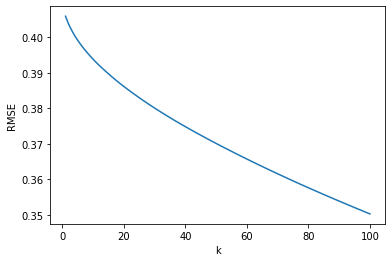

In [84]:
k = range(1,101)
plt.plot(k, rmse)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

In [85]:
print("RMSE for every k")
print("\n ".join([f"{x}:{y}" for x,y in zip(k, rmse)]))

RMSE for every k
1:0.4059194275420027
 2:0.4036697290523616
 3:0.4019610936172894
 4:0.40039436822383917
 5:0.39909415402170967
 6:0.39787211991954813
 7:0.39674615162107435
 8:0.3957158673784329
 9:0.394718892535586
 10:0.39378869108114695
 11:0.3928830147465206
 12:0.39204429375169386
 13:0.3912370573751802
 14:0.39045685920479717
 15:0.38968671745584804
 16:0.3889209441115823
 17:0.388199830132596
 18:0.3874857242553514
 19:0.3867920433717749
 20:0.3861177789799993
 21:0.3854642853960164
 22:0.3848227507961449
 23:0.3841998350328571
 24:0.3835782325582887
 25:0.38296447928311445
 26:0.3823639512384736
 27:0.3817687316850907
 28:0.3811874359719203
 29:0.38061163135154297
 30:0.3800492328038297
 31:0.3795000340014811
 32:0.3789547776618086
 33:0.3784127271412454
 34:0.37787826789848594
 35:0.3773516538847311
 36:0.37682787477243784
 37:0.37631255667195945
 38:0.3758092232861751
 39:0.3753116588625556
 40:0.37481684351919736
 41:0.37432642471391203
 42:0.37384202553126333
 43:0.3733585

The value of k when performing the SVD determines how many principal components you want to keep in the rank-k approximation of the original matrix. so the closer the k gets to the number of the components the lower the RMSE gets so when running it from 1 to a 100 when k = 100 is when it be the lowest . The larger the value of k is more principal components of the original matrix are kept the similar the approximation will be to the original matrix so the RMSE error will be lower 

In [29]:
business_averages

business_id
-0TffRSXXIlBYVbb5AwfTg    4.272727
-1B9pP_CrRBJYPICE5WbRA    3.750000
-2-ih3mE8KPyeKVIzpBfPQ    3.607143
-32hOCwsuKd04WO-HQyYFg    2.733333
-3e3CP3FFc-rvJj_-_airw    3.843750
                            ...   
zwd4dyQ5ovnjVojWfAuhMw    3.989691
zwgBxmrmPBF6N2uRTUYXrQ    3.426966
zwl7iLwHBTdkb5-0gNgGFg    4.875000
zz-fcqurtm77bZ_rVvo2Lw    4.153846
zz3E7kmJI2r2JseE6LAnrw    3.919355
Name: stars, Length: 4064, dtype: float64

                                                -Step 5-

In [30]:
user_avg = df_s3.groupby('user_id')['stars'].mean()
df_s3['user_avg'] = df_s3['user_id'].map(user_avg)
df_s3['stars_s5'] = df_s3['stars'] - df_s3['user_avg']

sparce matrix with R[u,b]:

In [31]:
r_s5 = csr_matrix((df_s3['stars_s5'].values, (df_s3['user_id_code'].values, df_s3['business_id_code'].values)))

In [32]:
df_s3

,user_id,business_id,stars,user_id_code,business_id_code,user_avg,stars_s5
0,FhOu3EwFDX75cFmt5pVvYw,eMiN8nm70jjKg8izikVWDA,4.0,1832,2660,3.969697,0.030303
1,lhfbA4aEcRGdKyci60MC7Q,qTb5bEgZdrwx2A3mNVK5mg,5.0,5406,3455,4.306122,0.693878
2,04hS_dGfUZd_5iJYRdPHLw,Auc20f0uYTIwPnJIqcdmNw,4.0,112,767,3.902174,0.097826
3,NeVJULvjNMzbWGZJf7XU0w,j-qtdD55OLfSqfsWuQTDJg,2.0,2655,2965,2.625000,-0.625000
4,eJLeCP82otO2OTPqDC3LyQ,ME7nOO4hHoCwkbssGqsyPA,5.0,4615,1485,4.708333,0.291667
...,...,...,...,...,...,...,...
271922,Ptij0-tuDk8--TEJDBBcRQ,0R2yKDNMUztQwgo8pG4z-Q,3.0,2921,92,3.844444,-0.844444
271923,SjWzcwYMiBvU52PtOV6QBQ,EtKSTHV5Qx_Q7Aur9o4kQQ,3.0,3242,1029,3.800000,-0.800000
271924,uPr3t2M-OykA8M_oro7j1A,d28lZlSps97FHhXZazJ8zA,4.0,6357,2572,3.926966,0.073034
271925,yxrDIW0b823PhQTZ0Q1KcA,lKU_kljhbEQKIPaM1Zbqiw,3.0,6861,3133,3.576923,-0.576923


In [33]:
from sklearn.metrics.pairwise import cosine_similarity


In [34]:
#p(u,b) without clipping
def p_value(user_id,business_id,k):
    #Get the businesses (step1):
    users, businesses = r_s5.nonzero()
    users_of_interest = users[businesses == business_id]
    index = np.where(users_of_interest == user_id)[0]
    #users_of_interest = np.delete(users_of_interest, index)
    #Get most similar (step 2):
    if(k >= len(users_of_interest)):
        most_similar_users = users_of_interest
        most_similar_users = np.delete(users_of_interest, index)
    elif(k < len(users_of_interest)):
        user_ratings = r_s5[users_of_interest, :].toarray()
        user_similarity = cosine_similarity(user_ratings)
        most_similar_indices = np.argsort(-user_similarity[index[0]])[:k+1]
        most_similar_indices = most_similar_indices[1:]
        most_similar_users = [users_of_interest[i] for i in most_similar_indices]
    else: #incase of zero values
        return 0
    #Get similarity scores
    user_vector = r_s5[user_id,:].toarray() 
    similar_users_vectors = r_s5[most_similar_users,:].toarray()
    similarity_scores = cosine_similarity(user_vector, similar_users_vectors)
    similarity_scores = similarity_scores.flatten() 
    #R[u',b]
    stars_s5 = r_s5[most_similar_users, business_id].toarray().flatten()
    return get_user_avg(user_id,df_s3)+ np.sum(stars_s5*similarity_scores)/np.sum(similarity_scores)


In [41]:
p_value(5083,2741,50)


2.834368953183535

In [40]:
k_values= [1,2,3,5,8,10,12,15,20,25,30,40,50]

In [39]:
def get_rating_from_df(user_id, business_id, df_s3):
    mask = (df_s3['user_id_code'] == user_id) & (df_s3['business_id_code'] == business_id)
    rating = df_s3[mask]['stars'].values[0]
    return rating

In [38]:
def get_k_values_ps(user_id,business_id,k_values):
    p_values_for_every_k = []
    for k in k_values:
        if (p_value(user_id,business_id,k) >5 ): #gets clipped
            p_values_for_every_k.append(5)
        elif (p_value(user_id,business_id,k) < 0 ):
            p_values_for_every_k.append(0)
        else:
            p_values_for_every_k.append(p_value(user_id,business_id,k))
    return p_values_for_every_k

In [37]:
def get_user_rate(user_id, df_s3):
    # Subset the dataframe to only include rows with the specified user_id
    user_df = df_s3[df_s3["user_id_code"] == user_id]
    user_rate = user_df["stars"].iloc[0]
    return user_rate

#used that in my formula and wasted so a lot of time 

In [36]:
def get_user_avg(user_id_code,df_s3):
    business_df = df_s3[df_s3['user_id_code'] == user_id_code]
    return business_df['stars'].mean()


In [42]:
def get_users_by_business(business_id_code):

    users, businesses = r_s5.nonzero()
    users_of_interest = users[businesses == business_id_code]
    return users_of_interest

In [ ]:
u=0
b=1411
pks =get_k_values_ps(u,b,k_values)
print("for the differnt k the p(%d,%d) are:"% (u, b))
print(pks)
print("The actual rating is:",get_rating_from_df(u,b, df_s3))

the basic idea is that since i am getting all the p(u,b)values for differnt ks all at once using the get_k_values_ps(user_id,business_id,k_values) i will try to apply it in all the (u,b)s and calculating simultaneously the RMSE for the diffent ks


In [63]:
import math 
row_indices, col_indices = r_s5.nonzero()
rmse=[0]*13
evenly_spaced_indices = np.linspace(0, len(row_indices)-1, 1000, dtype=int)
#since running thru the entire matrix takes too long i've decided to get (u,b) evenly throughout
#maybe a random function would have been a better fit (on second thought)
for i in evenly_spaced_indices:
    user_id_code = row_indices[i]
    business_id_code = col_indices[i]
    print(i) #to see the progress of the computation
    pvk= get_k_values_ps(user_id_code,business_id_code,k_values)
    for j in range(len(k_values)):
        if (i== evenly_spaced_indices[len(evenly_spaced_indices)-1]):
            rmse[j]= math.sqrt((rmse[j] + (get_rating_from_df(user_id_code,business_id_code, df_s3)-pvk[j])**2)/len(evenly_spaced_indices))
        else:
            rmse[j]= rmse[j] + (get_rating_from_df(user_id_code,business_id_code, df_s3) - pvk[j])**2
#can not use the sklearn.mean_squared_error since it needs arrays for that
#with this implemmetention the above code is neverending for trying to compute RMSE considering all the (u,b)s


0
255
511
767
1023
1278
1534
1790
2046
2301
2557
2813
3069
3324
3580
3836
4092
4347
4603
4859
5115
5370
5626
5882
6138
6393
6649
6905
7161
7417
7672
7928
8184
8440
8695
8951
9207
9463
9718
9974
10230
10486
10741
10997
11253
11509
11764
12020
12276
12532
12787
13043
13299
13555
13810
14066
14322
14578
14834
15089
15345
15601
15857
16112
16368
16624
16880
17135
17391
17647
17903
18158
18414
18670
18926
19181
19437
19693
19949
20204
20460
20716
20972
21227
21483
21739
21995
22251
22506
22762
23018
23274
23529
23785
24041
24297
24552
24808
25064
25320
25575
25831
26087
26343
26598
26854
27110
27366
27621
27877
28133
28389
28644
28900
29156
29412
29668
29923
30179
30435
30691
30946
31202
31458
31714
31969
32225
32481
32737
32992
33248
33504
33760
34015
34271
34527
34783
35038
35294
35550
35806
36061
36317
36573
36829
37085
37340
37596
37852
38108
38363
38619
38875
39131
39386
39642
39898
40154
40409
40665
40921
41177
41432
41688
41944
42200
42455
42711
42967
43223
43478
43734
43990
44246
44

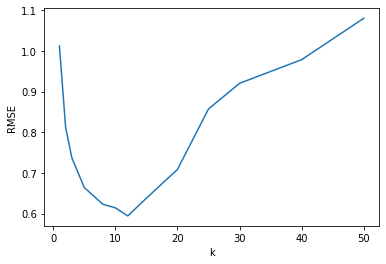

In [65]:

plt.plot(k_values, rmse)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

In [66]:
print("RMSE for every k")
print("\n ".join([f"{x}:{y}" for x,y in zip(k_values, rmse)]))

RMSE for every k
1:1.0125136939581287
 2:0.8120444001033168
 3:0.7374293135276098
 5:0.664265375275612
 8:0.6230888241360473
 10:0.6143423649945482
 12:0.5944423313821917
 15:0.63801064946483
 20:0.708740602829188
 25:0.8575575274890992
 30:0.9206980417030951
 40:0.9789317756091981
 50:1.0808145056971081


RMSE is around 0.6 when k is between 10 and 15, which is the lowest value of the reported RMSEs. So the model is most accurate when k is between 10 and 15.Maybe having more similar users (higher k) may overfit the data ,so the UCF trys to factor noise as data in which the error increases.
I've also tried computing the RMSE with lower amount of data which give better results (k between 10 & 15 is also better) since less data means less noise but also it meants that they may be not acurate 

                                                -Step 6-

In [91]:
import math
#print(matrix)

In [92]:
def p_val_icf(u,b,k):
#Step1: find the businesses that u has rated
    users, businesses = matrix.nonzero()
    businesses_of_interest = businesses[users == u]
    #users_of_interest = users[businesses == b]
    #Step 2:
    index = np.where(businesses_of_interest == b)[0]
    business_ratings = matrix[:,businesses_of_interest].toarray().T
    business_vector = matrix[:,b].toarray().T
    business_similarity = cosine_similarity(business_ratings,business_vector).T
    most_similar_indices = np.argsort(business_similarity[0])
    most_similar_indices = most_similar_indices[-k-1:-1]
    most_similar_businesses = [businesses_of_interest[i] for i in most_similar_indices]
    most_similar_businesses_scores = [business_similarity[0][i] for i in most_similar_indices]
    #find similarities
    other_avg = matrix[u,most_similar_businesses].toarray().flatten()
    #find similarities
    #compute p(u,b)
    for i in range(len(other_avg)):
        if (other_avg[i]>5):
            other_avg[i]=5
        elif(other_avg[i]<0):
            other_avg[i]=5
    #compute p(u,b)
    return get_user_avg(u,df_s3)+ np.sum(other_avg*most_similar_businesses_scores)/np.sum(most_similar_businesses_scores)
#this is more simple that the function for the UCF and also kinda faster (uses only one time the cosin.similarity
#and itarates less times the big sparce matrix 

In [93]:
def ps_4k_values_icf(user_id,business_id,k_values):
    p_values_for_every_k = []
    for k in k_values:
        if (p_val_icf(user_id,business_id,k) >5 ): #gets clipped
            p_values_for_every_k.append(5)
        elif (p_val_icf(user_id,business_id,k) < 0 ):
            p_values_for_every_k.append(0)
        else:
            p_values_for_every_k.append(p_val_icf(user_id,business_id,k))
    return p_values_for_every_k

In [94]:
row_indices, col_indices = r_s5.nonzero()
rmse=[0]*13
evenly_spaced_indices = np.linspace(0, len(row_indices)-1, 1000, dtype=int)
#since running thru the entire matrix takes too long i've decided to get (u,b) evenly throughout
#maybe a random function would have been a better fit (on second thought)
for i in evenly_spaced_indices:
    user_id_code = row_indices[i]
    business_id_code = col_indices[i]
    print(i) #to see the progress of the computation
    pvk= ps_4k_values_icf(user_id_code,business_id_code,k_values)
    for j in range(len(k_values)):
        if (i== evenly_spaced_indices[len(evenly_spaced_indices)-1]):
            rmse[j]= math.sqrt((rmse[j] + (get_rating_from_df(user_id_code,business_id_code, df_s3)-pvk[j])**2)/len(evenly_spaced_indices))
        else:
            rmse[j]= rmse[j] + (get_rating_from_df(user_id_code,business_id_code, df_s3) - pvk[j])**2

0
255
511
767
1023
1278
1534
1790
2046
2301
2557
2813
3069
3324
3580
3836
4092
4347
4603
4859
5115
5370
5626
5882
6138
6393
6649
6905
7161
7417
7672
7928
8184
8440
8695
8951
9207
9463
9718
9974
10230
10486
10741
10997
11253
11509
11764
12020
12276
12532
12787
13043
13299
13555
13810
14066
14322
14578
14834
15089
15345
15601
15857
16112
16368
16624
16880
17135
17391
17647
17903
18158
18414
18670
18926
19181
19437
19693
19949
20204
20460
20716
20972
21227
21483
21739
21995
22251
22506
22762
23018
23274
23529
23785
24041
24297
24552
24808
25064
25320
25575
25831
26087
26343
26598
26854
27110
27366
27621
27877
28133
28389
28644
28900
29156
29412
29668
29923
30179
30435
30691
30946
31202
31458
31714
31969
32225
32481
32737
32992
33248
33504
33760
34015
34271
34527
34783
35038
35294
35550
35806
36061
36317
36573
36829
37085
37340
37596
37852
38108
38363
38619
38875
39131
39386
39642
39898
40154
40409
40665
40921
41177
41432
41688
41944
42200
42455
42711
42967
43223
43478
43734
43990
44246
44

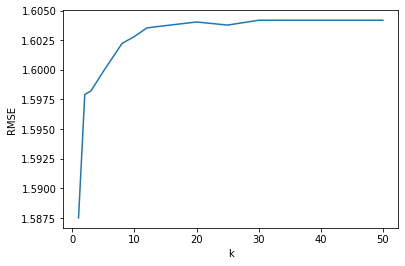

In [95]:
plt.plot(k_values, rmse)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

In [96]:
print("RMSE for every k")
print("\n ".join([f"{x}:{y}" for x,y in zip(k_values, rmse)]))

RMSE for every k
1:1.587513932320939
 2:1.597916994295037
 3:1.5982255794324545
 5:1.5998765688271521
 8:1.602227171172042
 10:1.6028145017927817
 12:1.6035380428378205
 15:1.6037303370782803
 20:1.6040360049177482
 25:1.6037747832301168
 30:1.6041834504250347
 40:1.6041834504250347
 50:1.6041834504250347


the RMSE values are very high, which means that the predictions of the model are not very accurate it can be seen that as k increases, the RMSE values decrease. However, the decrease is not significant after a certain point.From that it can be said that there are not enough similar businesses to make a more acurate prediction using this algorith